# MAT281 - Laboratorio N¬∞11

<a id='p1'></a>
## I.- Problema 01

Lista de actos delictivos registrados por el Service de police de la Ville de Montr√©al (SPVM).


<img src="http://henriquecapriles.com/wp-content/uploads/2017/02/femina_detenida-1080x675.jpg" width="480" height="360" align="center"/>

El conjunto de datos en estudio `interventionscitoyendo.csv` corresponde a  todos los delitos entre 2015 y agosto de 2020en Montreal. Cada delito est√° asociado en grandes categor√≠as, y hay informaci√≥n sobre la ubicaci√≥n, el momento del d√≠a, etc.

> **Nota**: Para m√°s informaci√≥n seguir el siguiente el [link](https://donnees.montreal.ca/ville-de-montreal/actes-criminels).

In [29]:
# librerias 

import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from metrics_regression import *


# graficos incrustados
plt.style.use('fivethirtyeight')
%matplotlib inline

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (12, 4)})

In [30]:
# read data

validate_categorie = [
  'Introduction', 'M√©fait','Vol dans / sur v√©hicule √† moteur', 'Vol de v√©hicule √† moteur',
]

df = pd.read_csv(os.path.join("data","interventionscitoyendo.csv"), sep=",", encoding='latin-1')
df.columns = df.columns.str.lower()
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df = df.loc[lambda x: x['categorie'].isin(validate_categorie)]
df = df.sort_values(['categorie','date'])
df.head()

categorie       date quart   pdq              x             y  \
3462   Introduction 2015-01-01  jour  42.0  297210.375006  5.050179e+06   
8370   Introduction 2015-01-01  soir  13.0  297145.531007  5.032845e+06   
11968  Introduction 2015-01-01  nuit   8.0  289215.072000  5.036423e+06   
12763  Introduction 2015-01-01  soir  27.0  293203.472992  5.045436e+06   
13686  Introduction 2015-01-01  soir  44.0  298915.433995  5.046912e+06   

       longitude   latitude  
3462  -73.597273  45.591480  
8370  -73.597834  45.435501  
11968 -73.699308  45.467564  
12763 -73.648516  45.548740  
13686 -73.575381  45.562090

Como tenemos muchos datos por categor√≠a a nivel de d√≠a, agruparemos a nivel de **semanas** y separaremos cada serie temporal.

In [31]:
cols = ['date','pdq']
y_s1 = df.loc[lambda x: x.categorie == validate_categorie[0] ][cols].set_index('date').resample('W').mean()
y_s2 = df.loc[lambda x: x.categorie == validate_categorie[1] ][cols].set_index('date').resample('W').mean()
y_s3 = df.loc[lambda x: x.categorie == validate_categorie[2] ][cols].set_index('date').resample('W').mean()
y_s4 = df.loc[lambda x: x.categorie == validate_categorie[3] ][cols].set_index('date').resample('W').mean()

El objetivo de este laboratorio es poder realizar un an√°lisis completo del conjunto de datos en estudio, para eso debe responder las siguientes preguntas:

1. Realizar un gr√°fico para cada serie temporal $y\_{si}, i =1,2,3,4$.


Text(0.5, 1.0, 'Introduction')

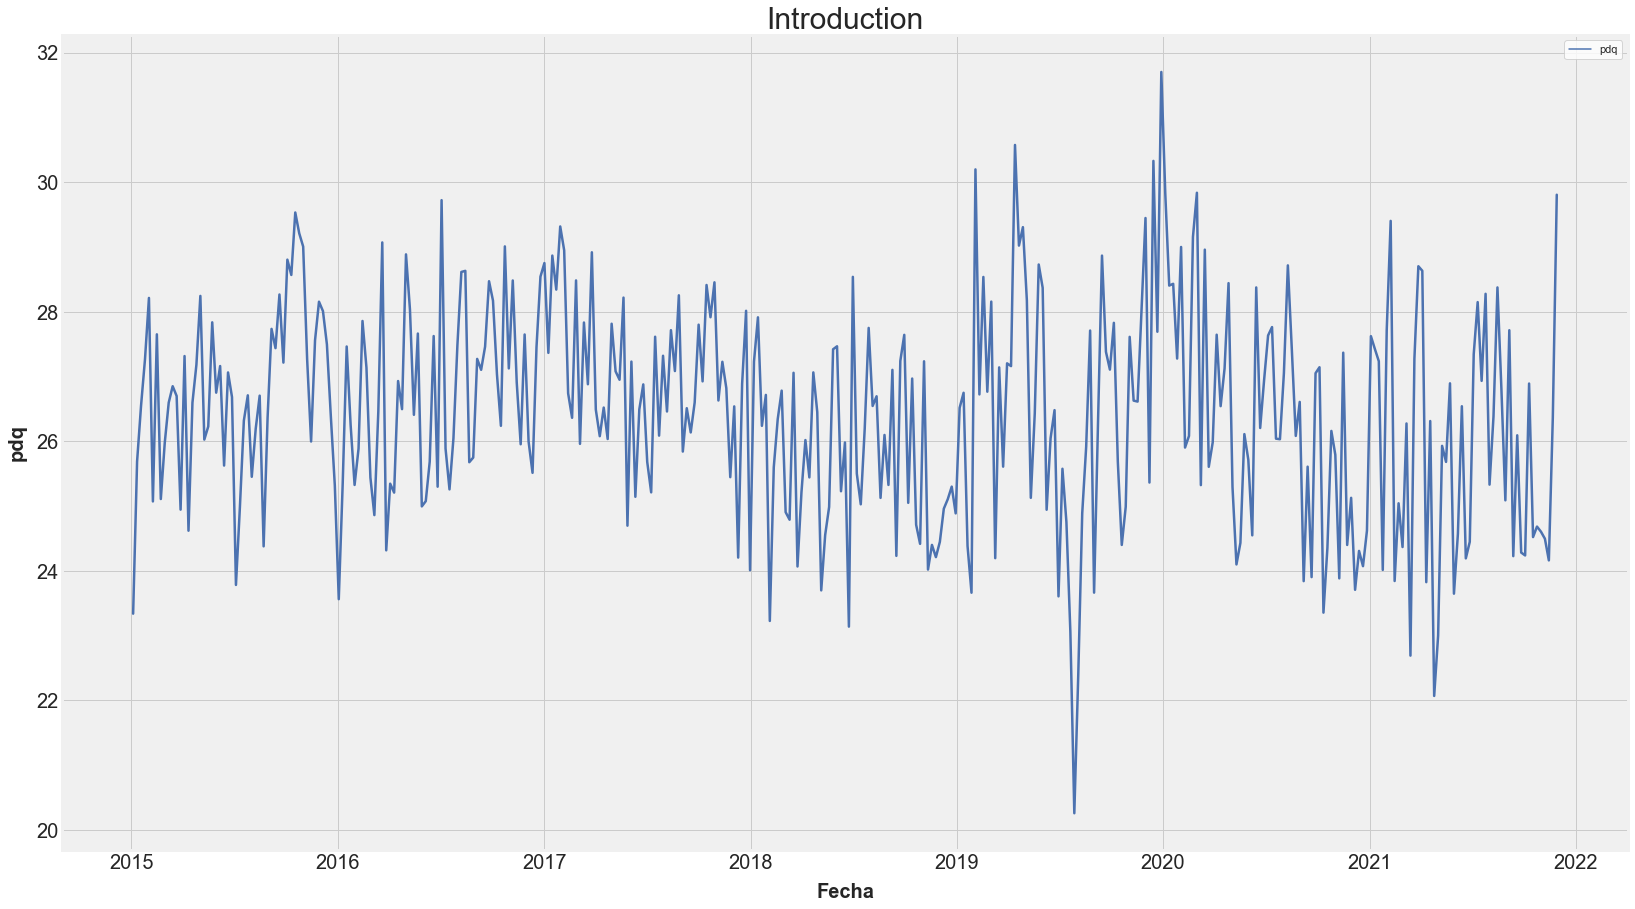

In [32]:
#y_s1

f, ax = plt.subplots(figsize=(25, 15));
sns.set_theme(style="whitegrid");

plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
sns.lineplot(data=y_s1, linewidth=2.5)
sns.cubehelix_palette(start=1, rot=-.5, as_cmap=True)

#leyendas
ax.set_xlabel("Fecha", fontsize=20, labelpad=10, fontweight='bold');
ax.set_ylabel("pdq", fontsize=20, labelpad=10, fontweight='bold');

# t√≠tulo
plt.title(validate_categorie[0], fontsize=30)


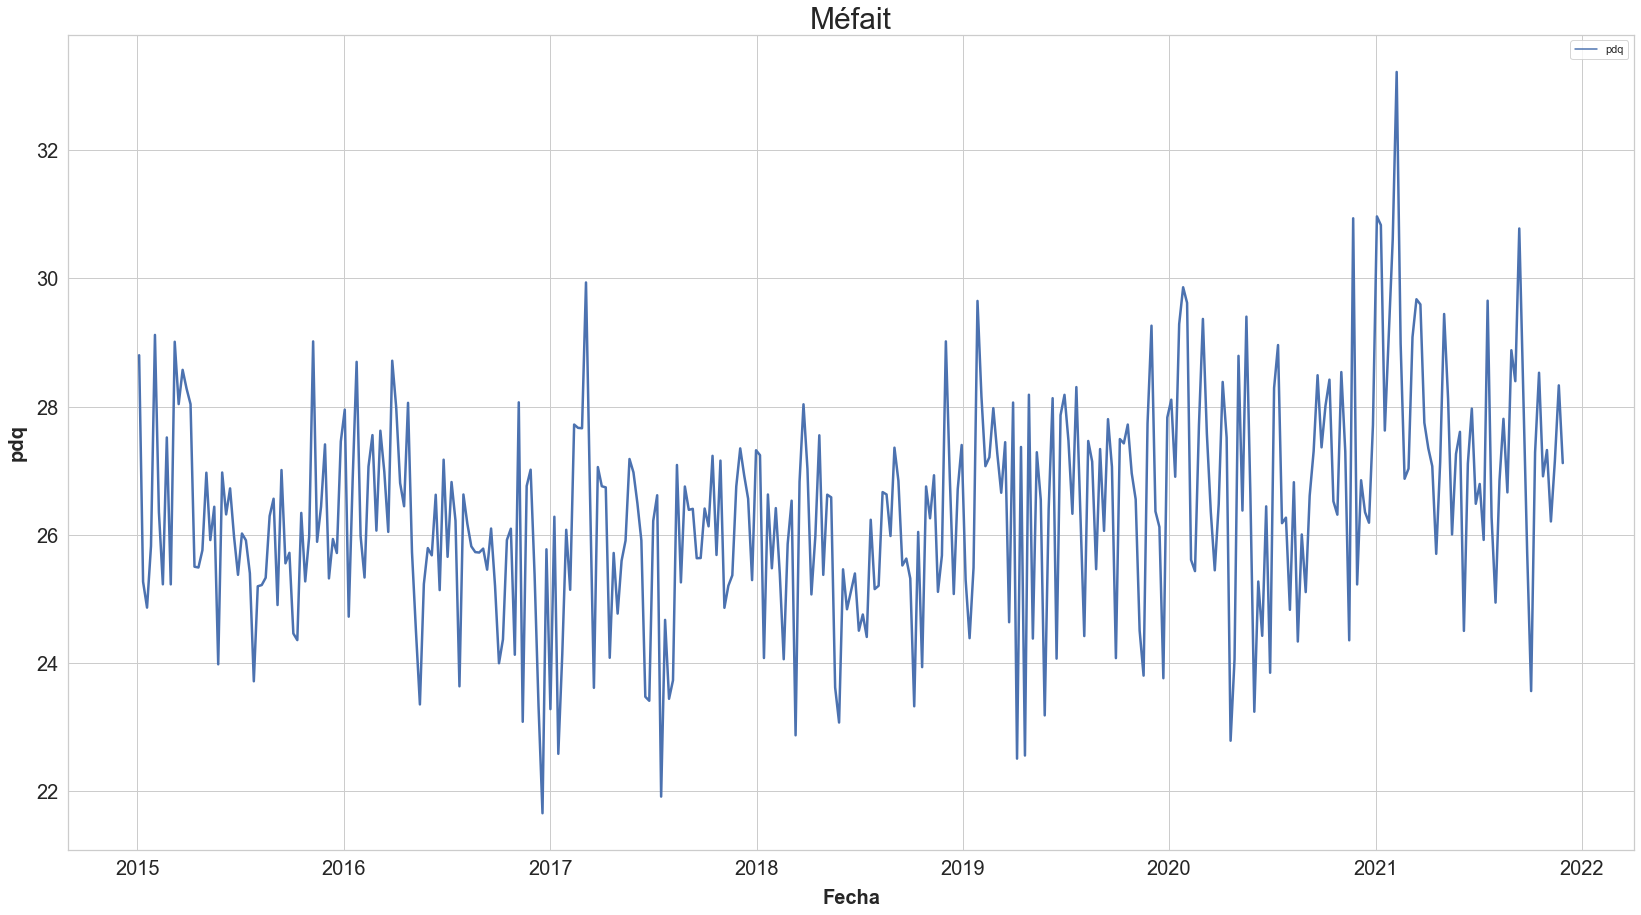

In [33]:
#y_s2

f, ax = plt.subplots(figsize=(25, 15));
sns.set_theme(style="whitegrid");

plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
sns.lineplot(data=y_s2, linewidth=2.5)
sns.cubehelix_palette(start=1, rot=-.5, as_cmap=True)

#leyendas
ax.set_xlabel("Fecha", fontsize=20, labelpad=10, fontweight='bold');
ax.set_ylabel("pdq", fontsize=20, labelpad=10, fontweight='bold');

#t√≠tulo por categor√≠a
plt.title(validate_categorie[1], fontsize=30)
plt.show()

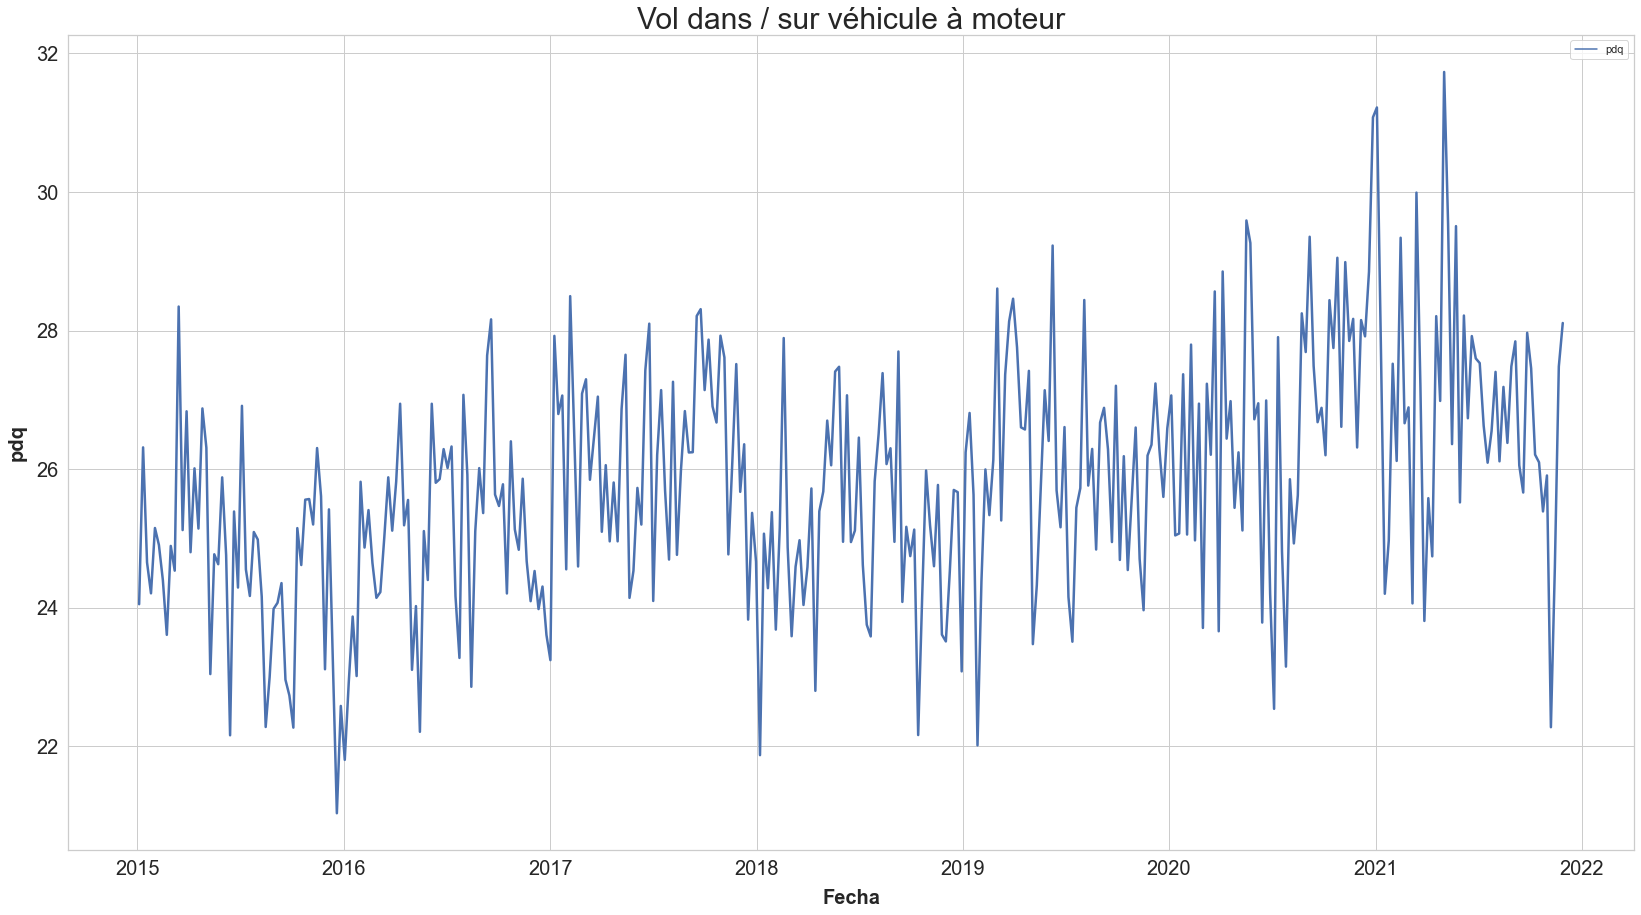

In [34]:
#y_s3

f, ax = plt.subplots(figsize=(25, 15));
sns.set_theme(style="whitegrid");

plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
sns.lineplot(data=y_s3, linewidth=2.5)
sns.cubehelix_palette(start=1, rot=-.5, as_cmap=True)

#leyendas
ax.set_xlabel("Fecha", fontsize=20, labelpad=10, fontweight='bold');
ax.set_ylabel("pdq", fontsize=20, labelpad=10, fontweight='bold');

# t√≠tulo por categor√≠a
plt.title(validate_categorie[2], fontsize=30)
plt.show()

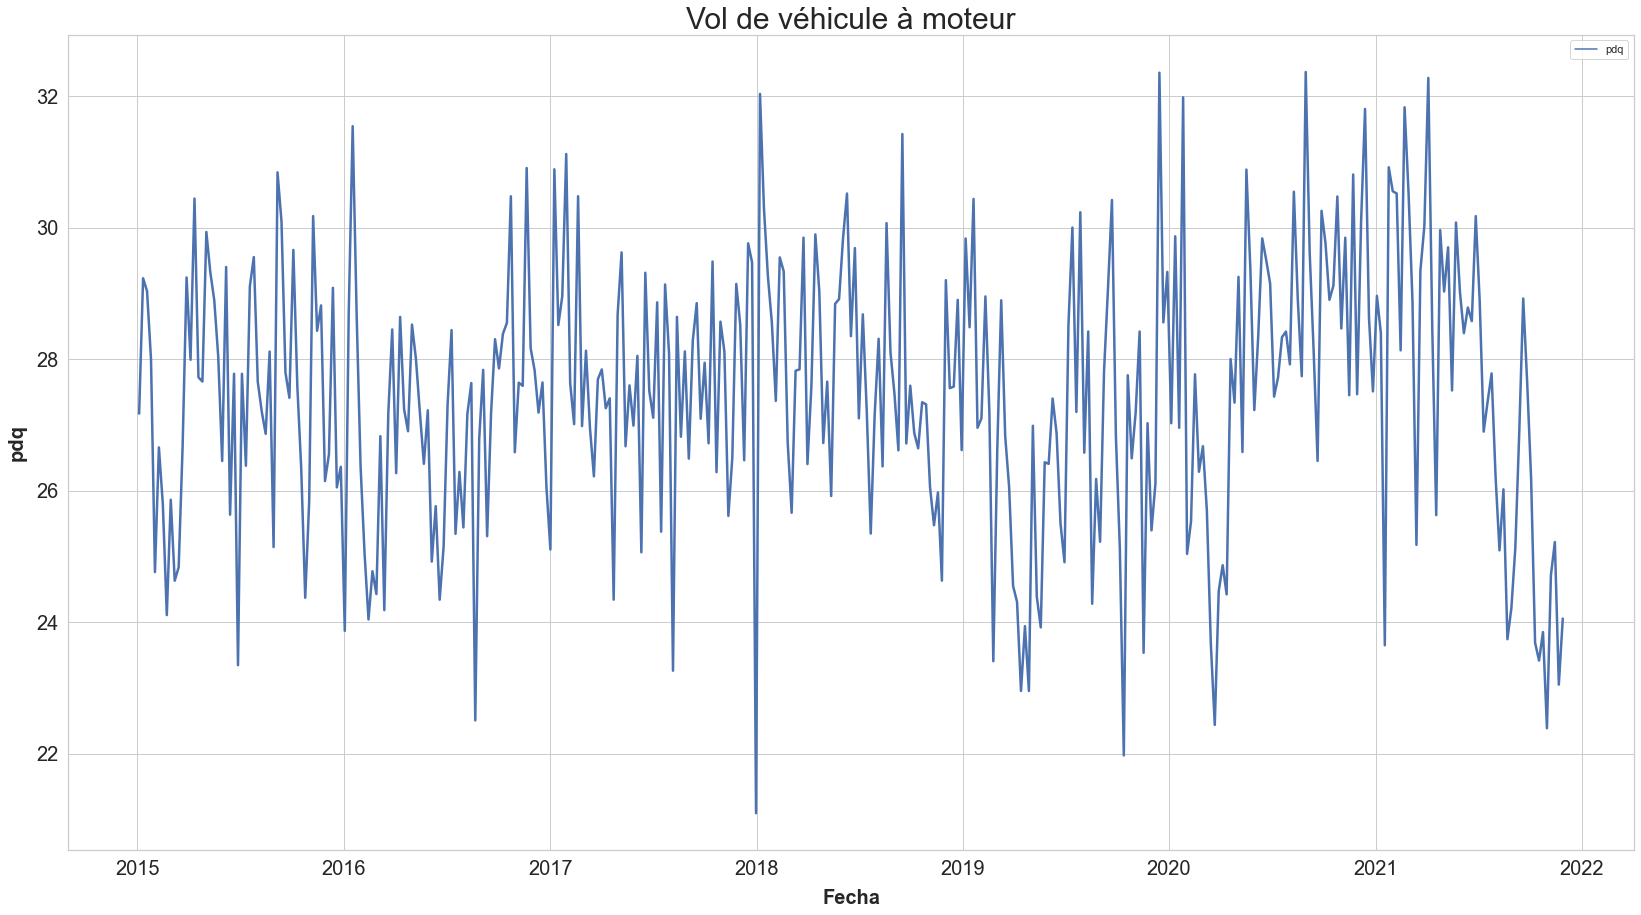

In [35]:
#y_s4

f, ax = plt.subplots(figsize=(25, 15));
sns.set_theme(style="whitegrid");

plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
sns.lineplot(data=y_s4, linewidth=2.5)
sns.cubehelix_palette(start=1, rot=-.5, as_cmap=True)

#leyendas
ax.set_xlabel("Fecha", fontsize=20, labelpad=10, fontweight='bold');
ax.set_ylabel("pdq", fontsize=20, labelpad=10, fontweight='bold');

#t√≠tulo por categor√≠a
plt.title(validate_categorie[3], fontsize=30)
plt.show()

2. Escoger alguna serie temporal $y\_{si}, i =1,2,3,4$. Luego:

* Realice un an√°lisis exploratorio de la serie temporal escogida
* Aplicar el modelo de pron√≥stico $SARIMA(p,d,q)x(P,D,Q,S)$, probando varias configuraciones de los hiperpar√°metros. Encuentre la mejor configuraci√≥n. Concluya.
* Para el mejor modelo encontrado, verificar si el residuo corresponde a un ruido blanco.

> **Hint**: Tome como `target_date` =  '2021-01-01'. Recuerde considerar que su columna de valores se llama `pdq`.


In [36]:
#Se crea clase SarimaModels:

class SarimaModels:
    def __init__(self,params):

        self.params = params
        
        
    @property
    def name_model(self):
        return f"SARIMA_{self.params[0]}X{self.params[1]}".replace(' ','')
    
    @staticmethod
    def test_train_model(y,date):
        mask_ds = y.index < date

        y_train = y[mask_ds]
        y_test = y[~mask_ds]        
        
        return y_train, y_test
    
    def fit_model(self,y,date):
        y_train, y_test = self.test_train_model(y,date )
        model = SARIMAX(y_train,
                        order=self.params[0],
                        seasonal_order=self.params[1],
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        
        model_fit = model.fit(disp=0)

        return model_fit
    
    def df_testig(self,y,date):
        y_train, y_test = self.test_train_model(y,date )
        model = SARIMAX(y_train,
                        order=self.params[0],
                        seasonal_order=self.params[1],
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        
        model_fit = model.fit(disp=0)
        
        start_index = y_test.index.min()
        end_index = y_test.index.max()

        preds = model_fit.get_prediction(start=start_index,end=end_index, dynamic=False)
        df_temp = pd.DataFrame(
            {
                'y':y_test['pdq'],
                'yhat': preds.predicted_mean
            }
        )
        
        return df_temp
    
    def metrics(self,y,date):
        df_temp = self.df_testig(y,date)
        df_metrics = summary_metrics(df_temp)
        df_metrics['model'] = self.name_model
        
        return df_metrics

# definir parametros 

import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

params = list(itertools.product(pdq,seasonal_pdq))
target_date = '2021-01-01'

# An√°lisis exploratorio de los datos

In [37]:
#------------------------------------------------#
        #elijo la base de datos de y_s3
#------------------------------------------------#


def resumen_por_columna(df,cols):
    pd_series = df[cols]
    
    # elementos distintos 
    l_unique = pd_series.unique()
    
    # elementos vacios
    
    l_vacios = pd_series[pd_series.isna()]
    
    df_info = pd.DataFrame({
        'columna': [cols],
        'unicos': [len(l_unique)],
        'vacios': [len(l_vacios)]
    })
    
    return df_info

frames = []

for col in y_s3.columns:
    aux_df = resumen_por_columna(y_s3,col)
    frames.append(aux_df)
    
df_info = pd.concat(frames).reset_index(drop=True)
df_info['% vacios'] = df_info['vacios']/len(df)
df_info

columna  unicos  vacios  % vacios
0     pdq     361       0       0.0

Tenemos s√≥lo una columna sin datos vac√≠os y 361 datos en total

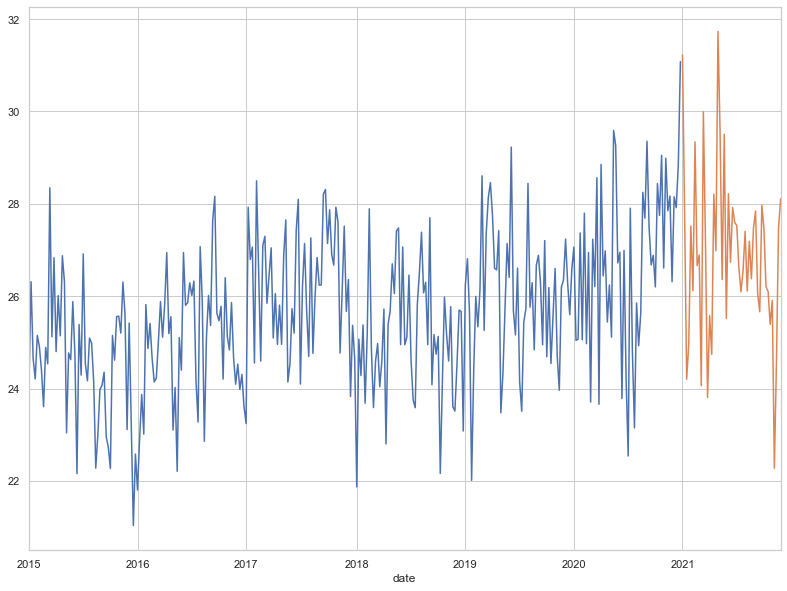

In [38]:
target_date = '2021-01-01'

# crear conjunto de entrenamiento y de testeo
mask_ds = y_s3.index < target_date

y_train = y_s3[mask_ds]
y_test = y_s3[~mask_ds]

#plotting the data

plt.subplots(figsize=(12, 10));
y_train['pdq'].plot()
y_test['pdq'].plot()
plt.show()

In [39]:
    #analizaremos distintas opciones de ùëÜùê¥ùëÖùêºùëÄùê¥(ùëù,ùëë,ùëû)ùë•(ùëÉ,ùê∑,ùëÑ,ùëÜ) 
    
    # definir parametros 

import itertools

p = d = r = range(0, 2)
pdr = list(itertools.product(p, d, r))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, r))]

params = list(itertools.product(pdr,seasonal_pdq))


In [40]:
# iterar para los distintos escenarios

frames = []
for param in params:
    try:
        sarima_model = SarimaModels(param)
        df_metrics = sarima_model.metrics(y_s3,target_date)
        frames.append(df_metrics)
    except:
        pass


In [41]:
# juntar resultados de las m√©tricas y comparar
df_metrics_result = pd.concat(frames)
df_metrics_result.sort_values(['mae','mape'])

mae       mse     rmse    mape   maape   wmape   mmape   smape  \
0    1.3633    3.4296   1.8519  0.0500  0.0499  0.0507  0.0482  0.0507   
0    1.3657    3.1739   1.7815  0.0511  0.0509  0.0508  0.0492  0.0508   
0    1.3671    3.3476   1.8296  0.0500  0.0499  0.0508  0.0483  0.0508   
0    1.3671    3.3476   1.8297  0.0501  0.0499  0.0508  0.0483  0.0508   
0    1.3695    3.4389   1.8544  0.0502  0.0500  0.0509  0.0484  0.0509   
..      ...       ...      ...     ...     ...     ...     ...     ...   
0   13.5654  221.9233  14.8971  0.5134  0.4559  0.5044  0.4946  0.3932   
0   23.2099  586.6421  24.2207  0.8634  0.6930  0.8631  0.8323  1.6564   
0   23.4758  587.2360  24.2330  0.8737  0.7040  0.8730  0.8422  1.6618   
0   26.6276  713.2692  26.7071  0.9915  0.7802  0.9902  0.9558  1.9759   
0   26.8918  726.4179  26.9521  1.0000  0.7854  1.0000  0.9640  2.0000   

                        model  
0   SARIMA_(0,0,0)X(1,1,1,12)  
0   SARIMA_(1,0,0)X(1,0,1,12)  
0   SARIMA_(0,0,1)X(0,1,1,12)  
0   SARIMA_(0,0,1)X(1,1,1,12)  
0   SARIMA_(0,0,0)X(0,1,1,12)  
..                        ...  
0   SARIMA_(0,1,0)X(0,1,0,12)  
0   SARIMA_(0,0,0)X(0,0,1,12)  
0   SARIMA_(0,0,1)X(0,0,1,12)  
0   SARIMA_(0,0,1)X(0,0,0,12)  
0   SARIMA_(0,0,0)X(0,0,0,12)  

[64 rows x 9 columns]

Se obtiene que la mejor configuraci√≥n es la SARIMA_(0,0,0)X(1,1,1,12)

In [42]:
# ajustar mejor modelo

param = [(0,0,0),(1,1,1,12)]
sarima_model =  SarimaModels(param)
model_fit = sarima_model.fit_model(y_s3,target_date)
best_model = sarima_model.df_testig(y_s3,target_date)
best_model.head()

y       yhat
2021-01-03  31.220000  25.875498
2021-01-10  27.801527  25.700010
2021-01-17  24.200000  26.385541
2021-01-24  24.966667  26.464668
2021-01-31  27.520833  26.587373

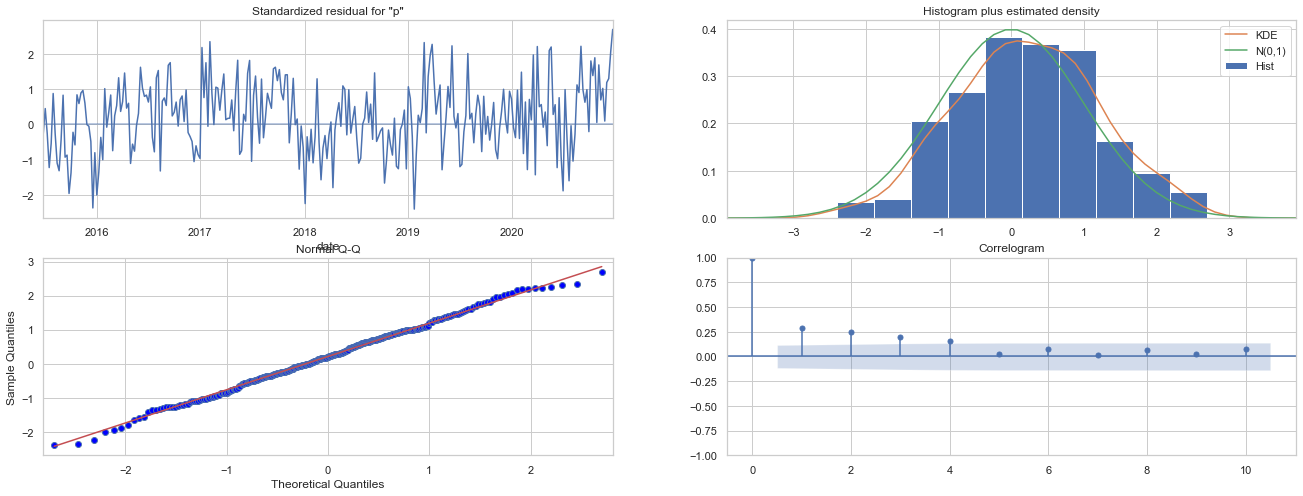

In [43]:
#------------------------------------------------#
        #comprobaci√≥n de ruido blanco
#------------------------------------------------#

model_fit.plot_diagnostics(figsize=(20, 8))
plt.show()

# Conclusi√≥n

Analizando los gr√°ficos se observa que:

    -Standardized residual for "p": Es una serie estacionaria torno al 0, lo que concuerda con el comportamiento de un ruido blanco
    -Histogram plus estimated density: El gr√°fico es similar a una distribuci√≥n normal, lo que tambi√©n concuerda con un ruido blanco
    -Normal Q-Q: Se observa una correlaci√≥n entre lo obtenido y una distribuci√≥n normal por lo que se concluye que corresponde a ruido blanco
    -Correlogram: No se observa ninguna correlaci√≥n entre las variables.
    
Finalmente, a partir de lo expuesto se concluye que el residuo corresponde a ruido blanco